In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scipy.stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import scale, minmax_scale, robust_scale
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_im

#jupyter 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# 주피터 노트북 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

import matplotlib.font_manager as fm 
font_list=[font.name for font in fm.fontManager.ttflist]
font_list
plt.rcParams['font.family']='NanumBarunGothic'

In [92]:
dt=pd.read_csv("/home/piai/바탕화면/강연주/과제/3/titanic.csv", engine='python')
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 1. 데이터 속성 및 기술 통계량 확인

In [93]:
dt.describe() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.758889,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002570,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 2. 목표변수 및 설명변수(범주형/연속형 변수별)의 분포 확인

#### Fare이외에는 보두 범주형 데이터이다. 

# 3. 변수들의 결측 및 이상치 처리

In [95]:
dt.isnull().sum() #객실번호 데이터가 많이 부족하다. 총 891개의 데이터 중 687개 부재 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [158]:
dt.drop(['Cabin'], axis='columns') #객실 데이터는 활용하기 어렵다고 판단되어 삭제한다. 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [159]:
dt=dt.dropna(subset=['Embarked']) #Embarked행에는 2개의 결측치가 있으므로 이를 제거해준다. 
dt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [96]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 가설1 : 여성이 남성보다 생존률이 높을 것이다 (성별에 따른 생존율 비교)

In [160]:
a=dt.groupby("Sex")["Survived"].agg("mean") #성별에 따른 생존율 구하기 

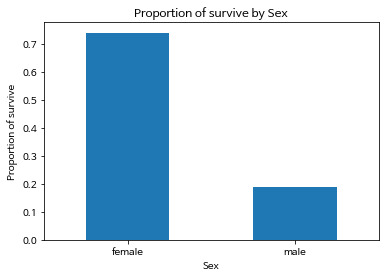

여성의 생존율은 74.2%인 반면, 남자의 생존률은 18.9%로 여성이 약 3.9배정도 많이 생존했음을 알 수 있다.


In [161]:
a.plot.bar() #성별에 따른 생존율 막대그래프 그리기 
plt.title("Proportion of survive by Sex")
plt.xlabel("Sex")
plt.xticks(rotation=0)
plt.ylabel("Proportion of survive")
plt.show()
print("여성의 생존율은 74.2%인 반면, 남자의 생존률은 18.9%로 여성이 약 3.9배정도 많이 생존했음을 알 수 있다.")

# 가설2 : 나이가 어릴수록 생존률이 높을 것이다 (나이와 생존율의 상관관계 )

In [229]:
dt_survived=dt[dt['Survived'] == 1] #생존자만 있는 데이터 프레임 만들기 
dt_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sum
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C,0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,1
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0


그래프를 확인해보면 0~10세의 아이들이 가장 생존률이 높은 것을 확인할 수 있다. 반면, 20~30세의 탑승자들은 가장 낮은 생존률을 보인다.


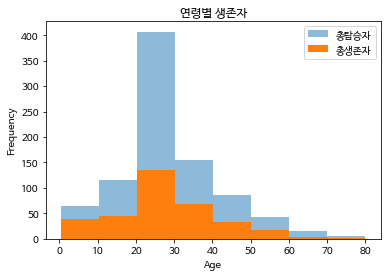

In [173]:
dt_survived=dt[dt['Survived']==1]
dt_survived
plt.hist(x='Age',data=dt, bins=8, label="총탑승자", alpha=0.5)
plt.hist(x='Age',data=dt_survived, bins=8, label="총생존자", alpha=1)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("연령별 생존자")
print("그래프를 확인해보면 0~10세의 아이들이 가장 생존률이 높은 것을 확인할 수 있다. 반면, 20~30세의 탑승자들은 가장 낮은 생존률을 보인다.")

# 가설 3 : 나이와 요금에 따라 생존 상관성이 있을까? 

표본이 은 200이하의 요금에서 요금이 증가할수록 생존자 비율이 증가함을 알 수 있다.


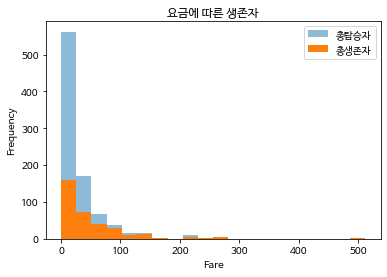

In [268]:
#나이는 검증했으므로 요금에 따른 생존 상관성에 대해 검토하겠다. 
plt.hist(x='Fare',data=dt, bins=20, label="총탑승자", alpha=0.5)
plt.hist(x='Fare',data=dt_survived, bins=20, label="총생존자", alpha=1)
plt.legend()
plt.xlabel("Fare")
plt.ylabel("Frequency")
plt.title("요금에 따른 생존자")
print("표본이 은 200이하의 요금에서 요금이 증가할수록 생존자 비율이 증가함을 알 수 있다.")

# 가설4 : P-class가 높을수록 생존율이 높을 것이다. ( 요금에 따른 생존율의 상관관계 )

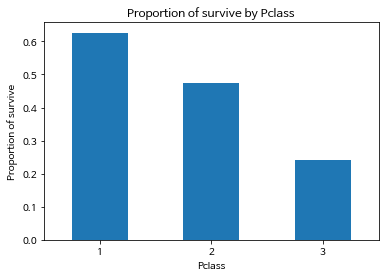

1등급 승객은 60%이상의 높은 생존율을 보이는 반면 승객의 3등급은 30%에도 미치지 못하는 낮은 생존율을 보인다.그래프를 통해 승객 등급이 높을수록 높은 생존율을 보임을 알 수 있다.


In [174]:
p_class=dt.groupby("Pclass")["Survived"].agg("mean") # 승객등급에 따른 생존률 평균 구하기 (생존=1, 사망=0)
p_class.plot.bar()
plt.title("Proportion of survive by Pclass")
plt.xlabel("Pclass")
plt.xticks(rotation=0)
plt.ylabel("Proportion of survive")
plt.show()
print("1등급 승객은 60%이상의 높은 생존율을 보이는 반면 승객의 3등급은 30%에도 미치지 못하는 낮은 생존율을 보인다.그래프를 통해 승객 등급이 높을수록 높은 생존율을 보임을 알 수 있다.")

# 가설 4-1 : P-class와 성별에 따라 생존율 차이가 있을 것이다. ( 요금과 성별에 따른 생존 )

In [165]:
p_class_1=dt.pivot_table(index='Sex', columns='Pclass', values='Survived')
p_class_1 # pivot table을 통해, 성별, Pclass별로 생존율을 구한다. 

Pclass,1,2,3
Sex,,,
female,0.967391,0.921053,0.500000
male,0.368852,0.157407,0.135447


히트맵 결과를 보면 여성의 생존 비율이 남성에 비해 확연히 높고, 각 성별에서도 승객 등급이 높을수록 생존율이 높은 것을 확인할 수 있다. 1등급 여성 96.8%의 높은 생존율 보이며, 가장 13.5%의 가장 낮은 생존율 보이는 3등급 남성보다 약 7배가 넘는 높은 생존율을 보인다.


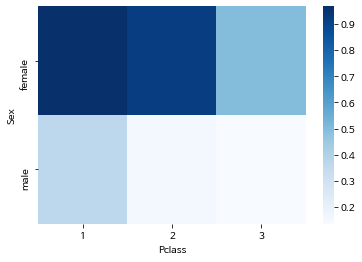

In [166]:
sns.heatmap(p_class_1,cmap="Blues") # pivot table 결과를 heat-map으로 나타낸다.
print("히트맵 결과를 보면 여성의 생존 비율이 남성에 비해 확연히 높고, 각 성별에서도 승객 등급이 높을수록 생존율이 높은 것을 확인할 수 있다. 1등급 여성 96.8%의 높은 생존율 보이며, 가장 13.5%의 가장 낮은 생존율 보이는 3등급 남성보다 약 7배가 넘는 높은 생존율을 보인다.")

# 가설 5,6 : 항구에 따라 생존율 차이가 날 것이다. P-class와 항구에 따른 생존율의 차이 

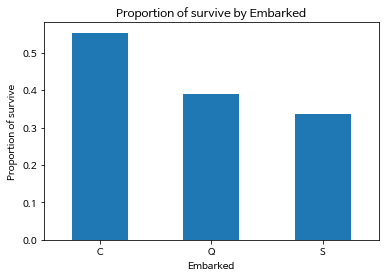

항구에 따라 생존율의 차이가 확연히 다르며 C에서 탑승한 승객은 50%이상의 생존율을 보이고 있다. 앞선 P-class에 따라 생존율이 차이가 난 결과를 토대로, 각 항구의 경제 수준에 따라 생존율이 차이가 있는지 확인하기 위해 항구의 위치과 p-class 승객 등급의 상관관계를 조사하였다.


In [274]:
p_class=dt.groupby("Embarked")["Survived"].agg("mean")
p_class.plot.bar()
plt.title("Proportion of survive by Embarked")
plt.xlabel("Embarked")
plt.xticks(rotation=0)
plt.ylabel("Proportion of survive")
plt.show()
print("항구에 따라 생존율의 차이가 확연히 다르며 C에서 탑승한 승객은 50%이상의 생존율을 보이고 있다. 앞선 P-class에 따라 생존율이 차이가 난 결과를 토대로, 각 항구의 경제 수준에 따라 생존율이 차이가 있는지 확인하기 위해 항구의 위치과 p-class 승객 등급의 상관관계를 조사하였다.")

In [253]:
dt_1=dt[['Embarked','Pclass']]
table=pd.crosstab(index=dt['Embarked'],columns=df['Pclass'])
table

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


항구의 위치와 p-class 승객 등급의 상관관계를 조사한 결과 3등급의 승객은 S 항구도시에 위치함을 알 수 있다. 이 결과는 S항구 도시의 경제 수준이 다른 항구보다 낮음을 암시한다.


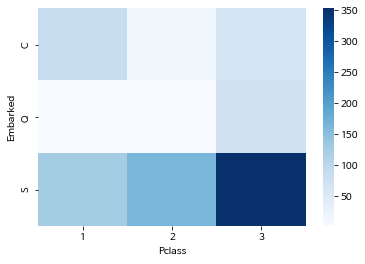

In [255]:
sns.heatmap(table,cmap='Blues') 
print("항구의 위치와 p-class 승객 등급의 상관관계를 조사한 결과 3등급의 승객은 S 항구도시에 위치함을 알 수 있다. 이 결과는 S항구 도시의 경제 수준이 다른 항구보다 낮음을 암시한다.")

In [139]:
PE=dt.pivot_table(index='Embarked', columns='Pclass', values='Survived')
PE # pivot table을 통해, 성별, Pclass별로 생존율을 구한다. 

Pclass,1,2,3
Embarked,,,
C,0.694118,0.529412,0.378788
Q,0.500000,0.666667,0.375000
S,0.582677,0.463415,0.189802


항구의 위치, 승객 등급, 생존율을 모두 고려하였을 때, S항구에서 승선한 3등급의 승객이 가장 낮은 생존율을 보이는다. 이런 결과는 경제 수준이 생존율에 영향을 미쳤을 수 있음을 암시할 수 있다.


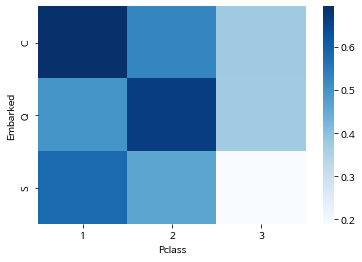

In [256]:
sns.heatmap(PE,cmap="Blues")
print("항구의 위치, 승객 등급, 생존율을 모두 고려하였을 때, S항구에서 승선한 3등급의 승객이 가장 낮은 생존율을 보이는다. 이런 결과는 경제 수준이 생존율에 영향을 미쳤을 수 있음을 암시할 수 있다.")

# 가설 7,8 : 가족이 남아 있을수록 생존률이 높을 것이다.

In [217]:
dt['sum']=df['SibSp']+df['Parch']
dt

<ipython-input-217-fdf8ddd5b44b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['sum']=df['SibSp']+df['Parch']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


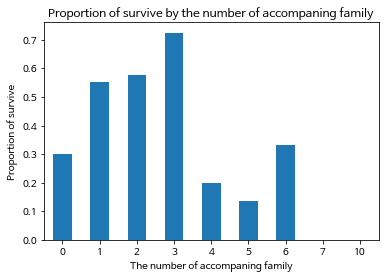

동승가족이 0에서 3명에서 증가함에 따라 생존율은 상승하지만, 4명 이상일 때는 현저하게 떨어진다. 이러한 이유는 가족 동행이 4명 이상인 확률이 작기 때문일 것으로 생각된다.


In [226]:
em=dt.groupby("sum")["Survived"].agg("mean")
em.plot.bar()
plt.title("Proportion of survive by the number of accompaning family")
plt.xlabel("The number of accompaning family")
plt.xticks(rotation=0)
plt.ylabel("Proportion of survive")
plt.show()
print("동승가족이 0에서 3명에서 증가함에 따라 생존율은 상승하지만, 4명 이상일 때는 현저하게 떨어진다. 이러한 이유는 가족 동행이 4명 이상인 확률이 작기 때문일 것으로 생각된다.")

히스토그램에서 동승 가족 수가 4명이상일 때, 현저하게 감소하는 것을 확인할 수 있다.따라서 위 그래프는 표본이 충분히 많은 0-3명의 동승 가족수에서 생존율과 양의 상관성이 있다고 할 수 있다.


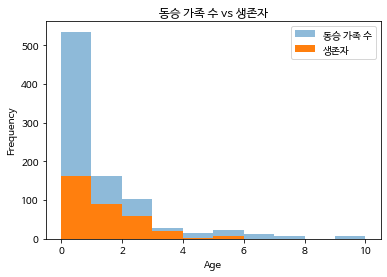

In [225]:
dt_survived=dt[dt['Survived']==1]
dt_survived
plt.hist(x='sum',data=dt, bins=10, label="동승 가족 수", alpha=0.5)
plt.hist(x='sum',data=dt_survived, bins=6, label="생존자", alpha=1)
plt.legend()
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("동승 가족 수 vs 생존자")
print("히스토그램에서 동승 가족 수가 4명이상일 때, 현저하게 감소하는 것을 확인할 수 있다.따라서 위 그래프는 표본이 충분히 많은 0-3명의 동승 가족수에서 생존율과 양의 상관성이 있다고 할 수 있다.")

In [277]:
print("결론 : 어른보다는 아이가, 남성보다는 여성이 생존율이 높았다. 이는 구조 당시 아이와 여성을 우선으로 구출하던 방식에 기인한 것으로 생각된다. 또한 동승한 가족이 많을수록 생존 확률이 높았다. 두번째로, 탑승 항구와 탑승객의 등급에 따라 생존율의 차이가 있는데, 높은 등급의 탑승권을 구매하며, 거주지의 소득수준이 높을수록 생존율이 높아지는 것으로 추정된다. ")

결론 : 어른보다는 아이가, 남성보다는 여성이 생존율이 높았다. 이는 구조 당시 아이와 여성을 우선으로 구출하던 방식에 기인한 것으로 생각된다. 또한 동승한 가족이 많을수록 생존 확률이 높았다. 두번째로, 탑승 항구와 탑승객의 등급에 따라 생존율의 차이가 있는데, 높은 등급의 탑승권을 구매하며, 거주지의 소득수준이 높을수록 생존율이 높아지는 것으로 추정된다. 
